In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
#%matplotlib notebook

 # Video i/p 

In [3]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")

# 0 - 2019-12-19 19-53-16-355.mov
# this 21500--> 0 - 2019-12-19 19-35-05-273.mov
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-53-16-355.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

16092.0

In [4]:
cap.set(cv2.CAP_PROP_POS_FRAMES,200)

True

In [5]:
#%matplotlib notebook

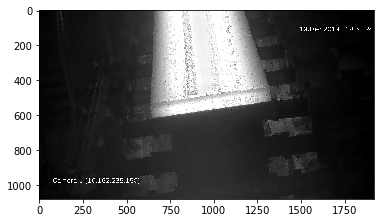

In [6]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
#print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

In [7]:
cv2.imwrite("ref1.jpg",frame)

True

# pixels Per Metric

In [8]:
alar = [636,816,1423,700]

In [9]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


2.1244420583247448 <<<<<-----------------MM per Pix


In [10]:
while(True):
    ret, img = cap.read()
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)
    
    #dst = cv2.addWeighted(y, .75, r, .601, 0.0)
    dst = cv2.addWeighted(y, .75, r, .751, 0.0)
    
    blur = cv2.GaussianBlur(dst,(5,5),0)
    
    #_,thresh = cv2.threshold(blur,110,255,cv2.THRESH_BINARY)
    _,thresh = cv2.threshold(blur,125,255,cv2.THRESH_BINARY) 
    #thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-13)

    
    _ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    ordr = 0
    epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)
    dstCnt = cv2.drawContours(img.copy(),[approx],ordr,(255),2)
    val = 816
    
    
    if np.count_nonzero(thresh[val,]) >= 500:
        leftSide = np.nonzero(thresh[val,])[0][0] - 3
        rightSide = np.nonzero(thresh[val,])[0][-1]- 30
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) - 20
        print(mmPpix)
        img  = cv2.line(img ,(np.nonzero(thresh[816,])[0][0] - 3,alar[1]),((np.nonzero(thresh[816,])[0][-1]-30),alar[3]),(0,255,0),2)
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(0,255,0),3)
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 1.2, (200,255,155), 2, cv2.LINE_AA)

    
    img1 = cv2.resize(img ,(900,500))
    img2 = cv2.resize(dstCnt,(500,300))
    img3 = cv2.resize(thresh,(500,300))
    cv2.imshow('img ',img)
    #cv2.imshow('img ',img1)
    #cv2.imshow('img ',img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()